EDA for Tom Brady Data

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('data/TB_data.csv')
df.head()

,Year,Age,Tm,Pos,No.,G,GS,QBrec,Cmp,Att,...,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,AV,Awards
0,2000,23,NWE,qb,12.0,1,0,NaN,1,3,...,NaN,0,0,0.0,2.00,2.00,NaN,NaN,0.0,NaN
1,2001,24,NWE,QB,12.0,15,14,11-3-0,264,413,...,NaN,41,216,9.0,5.79,5.39,3.0,3.0,12.0,PB
2,2002,25,NWE,QB,12.0,16,16,9-7-0,373,601,...,NaN,31,190,4.9,5.66,5.54,2.0,3.0,13.0,NaN
3,2003,26,NWE,QB,12.0,16,16,14-2-0,317,527,...,NaN,32,219,5.7,6.08,5.94,3.0,5.0,11.0,AP MVP-3
4,2004,27,NWE,QB,12.0,16,16,14-2-0,288,474,...,NaN,26,162,5.2,7.06,6.92,0.0,1.0,16.0,PB


In [3]:
df2 = df.drop(labels=[23,24,25], axis=0)
df2

,Year,Age,Tm,Pos,No.,G,GS,QBrec,Cmp,Att,...,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,AV,Awards
0,2000,23,NWE,qb,12.0,1,0,NaN,1,3,...,NaN,0,0,0.0,2.00,2.00,NaN,NaN,0.0,NaN
1,2001,24,NWE,QB,12.0,15,14,11-3-0,264,413,...,NaN,41,216,9.0,5.79,5.39,3.0,3.0,12.0,PB
2,2002,25,NWE,QB,12.0,16,16,9-7-0,373,601,...,NaN,31,190,4.9,5.66,5.54,2.0,3.0,13.0,NaN
3,2003,26,NWE,QB,12.0,16,16,14-2-0,317,527,...,NaN,32,219,5.7,6.08,5.94,3.0,5.0,11.0,AP MVP-3
4,2004,27,NWE,QB,12.0,16,16,14-2-0,288,474,...,NaN,26,162,5.2,7.06,6.92,0.0,1.0,16.0,PB
5,2005,28,NWE,QB,12.0,16,16,10-6-0,334,530,...,NaN,26,188,4.7,7.05,6.86,3.0,4.0,15.0,AP MVP-3 AP OPoY-4 AP2 PB
6,2006,29,NWE,QB,12.0,16,16,12-4-0,319,516,...,68.6,26,175,4.8,6.19,6.08,2.0,2.0,14.0,NaN
7,2007,30,NWE,QB,12.0,16,16,16-0-0,398,578,...,87.0,21,128,3.5,7.81,8.88,4.0,4.0,23.0,AP MVP-1 AP OPoY-1 AP1 PB
8,2008,31,NWE,qb,12.0,1,1,1-0-0,7,11,...,59.5,0,0,0.0,6.91,6.91,NaN,NaN,0.0,NaN
9,2009,32,NWE,QB,12.0,16,16,10-6-0,371,565,...,74.1,16,86,2.8,7.42,7.38,1.0,1.0,17.0,AP CPoY-1 PB


In [4]:
df3 = df.iloc[[24,25],:]
df3

,Year,Age,Tm,Pos,No.,G,GS,QBrec,Cmp,Att,...,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,AV,Awards
24,20 yrs,20 yrs,NWE,NaN,NaN,285,283,219-64-0,6377,9988,...,NaN,500,3129,4.8,6.81,7.08,36.0,45.0,285.0,NaN
25,3 yrs,3 yrs,TAM,NaN,NaN,37,37,26-11-0,992,1484,...,NaN,50,338,3.3,6.96,7.38,6.0,9.0,31.0,NaN


<AxesSubplot:title={'center':'Team vs. Yards per Game Career Totals'}, xlabel='Tm'>

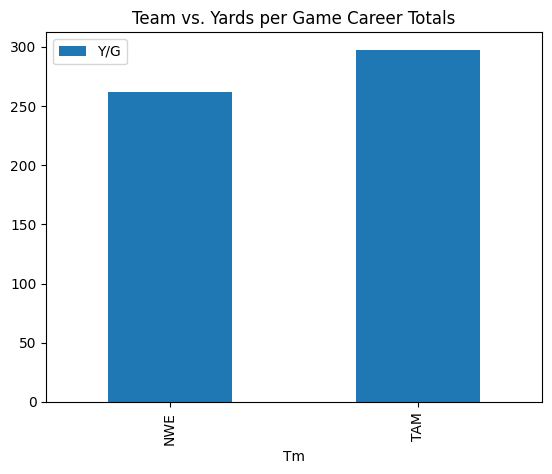

In [6]:
df3.plot.bar(x="Tm", y="Y/G",title="Team vs. Yards per Game Career Totals")

<AxesSubplot:title={'center':'Year vs. Yards per Game'}, xlabel='Year', ylabel='Yards per Game'>

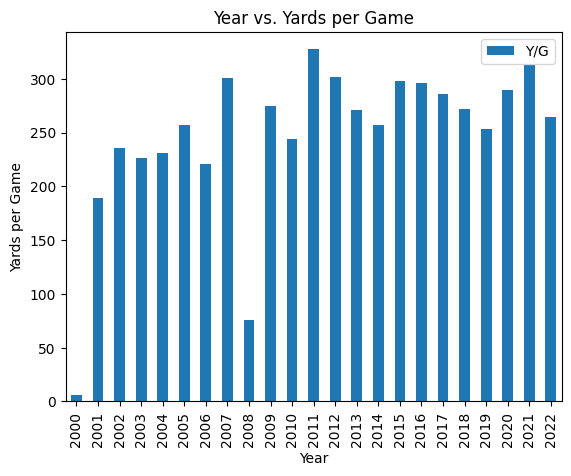

In [7]:
df2.plot.bar(x = "Year", y="Y/G", title="Year vs. Yards per Game", ylabel="Yards per Game")


In [8]:
corrMat = df2.corr()

Superbowl stats

In [9]:
dfS = pd.read_csv('data/TB_superbowl_data.csv')
dfS

,Year,SB,Tm,Opp,Result,Cmp,Att,Yds,TD,Int,Lng,Rate,Att.1,Yds.1,TD.1,Lng.1,Rec,Yds.2,TD.2,Lng.2
0,2001,XXXVI,NWE,STL,W 20-17,16,27,145,1,0,23,86.2,1,3,0,3,0,0,0,0
1,2003,XXXVIII,NWE,CAR,W 32-29,32,48,354,3,1,52,100.5,2,12,0,12,0,0,0,0
2,2004,XXXIX,NWE,PHI,W 24-21,23,33,236,2,0,27,110.2,1,-1,0,-1,0,0,0,0
3,2007,XLII,NWE,NYG,L 14-17,29,48,266,1,0,19,82.5,0,0,0,0,0,0,0,0
4,2011,XLVI,NWE,NYG,L 17-21,27,41,276,2,1,21,91.1,0,0,0,0,0,0,0,0
5,2014,XLIX,NWE,SEA,W 28-24,37,50,328,4,2,23,101.1,2,-3,0,-1,0,0,0,0
6,2016,LI,NWE,ATL,W 34-28,43,62,466,2,1,28,95.2,1,15,0,15,0,0,0,0
7,2017,LII,NWE,PHI,L 33-41,28,48,505,3,0,50,115.4,1,6,0,6,0,0,0,0
8,2018,LIII,NWE,LAR,W 13-3,21,35,262,0,1,29,71.4,2,-2,0,-1,0,0,0,0
9,2020,LV,TAM,KAN,W 31-9,21,29,201,3,0,31,125.8,4,-2,0,0,0,0,0,0


<AxesSubplot:title={'center':'Team vs. Yards'}, xlabel='Tm'>

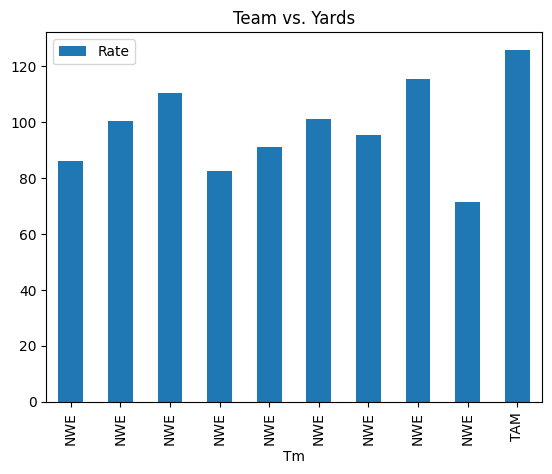

In [43]:
dfS.plot.bar(x="Tm", y="Rate",title="Team vs. Yards")

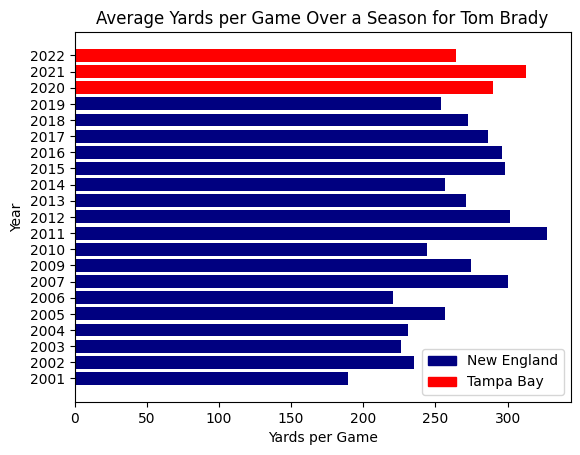

In [10]:
df_sample = df2.drop(labels=[0,8], axis=0, inplace=False)
# sample_NWE = df_sample["Y/G"] & df_sample["Tm"] == "NWE"
# sample_TAM = df_sample["Y/G"] & df_sample["Tm"] == "TAM"
colors = ["navy", "navy", "navy", "navy", "navy", "navy", "navy", "navy", "navy", "navy", "navy", "navy", "navy", "navy", "navy", "navy", "navy", "navy", "red", "red","red"]
b = plt.barh(y=df_sample["Year"], width=df_sample["Y/G"], color=colors)
plt.xlabel("Yards per Game")
plt.ylabel("Year")
plt.title("Average Yards per Game Over a Season for Tom Brady")
nwe = mpatches.Patch(color="navy", label="New England")
tam = mpatches.Patch(color="red", label="Tampa Bay")
plt.legend(handles=[nwe,tam])
plt.savefig("TB_YG.png", dpi=300)

This plot shows us Tom Brady's performance based on his Yards/Game over each season, excluding 2008 (Injury) and 2000 (first year). From this graph, we see that in 2011 he had the most yards per game, exceeding 300. We can also see a slight trend in his first few seasons, where the yards per game steadily increased to a varying maximum at about 2005-2007. Finally, we see that his performance at Tampa Bay fits within the range of many of his seasons at New England.

Text(0.5, 1.0, 'Yards per Game on Tampa Bay for all seasons vs. New England last 3 seasons')

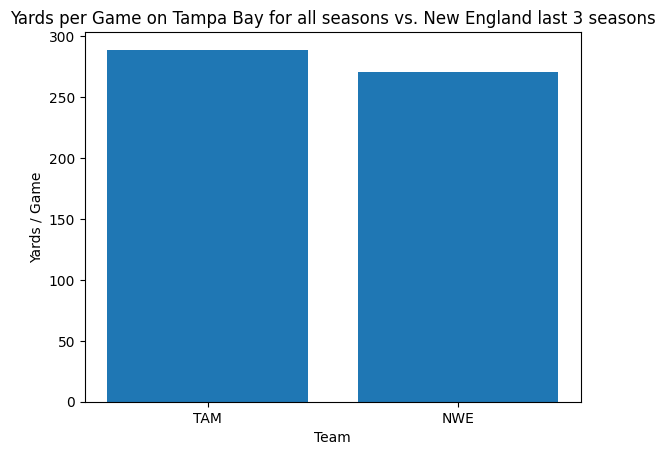

In [11]:
df_sample_TAM = df2[df2["Tm"] == "TAM"]
df_sample_NWE = df2[df2["Tm"] == "NWE"].tail(3)
mean_NWE = df_sample_NWE["Y/G"].mean()
mean_TAM = df_sample_TAM["Y/G"].mean()
plt.bar(x=["TAM", "NWE"], height=[mean_TAM, mean_NWE])
plt.xlabel("Team")
plt.ylabel("Yards / Game")
plt.title("Yards per Game on Tampa Bay for all seasons vs. New England last 3 seasons")

Shows us that there appears to be some difference between the yards per game for all three seasons so far at Tampa Bay vs. the last 3 seasons he had at New England. Both show Y/G that rank Tom Brady in the top 20 QB's. This is imposible to draw conclusions from due to the high variability in his teams abilities along with changes in rules causing differences across the board in yards per game.

Using the NFL's ranking system for quarterbacks they score based upon the following: [[(Completion percentage - 30) / 0.05 + (yards per passing attempt - 3) * 0.25 + touchdown passing percentage * 0.2 + percentage of interceptions per passing attempts * 0.5 - 2.375] / 6] * 100

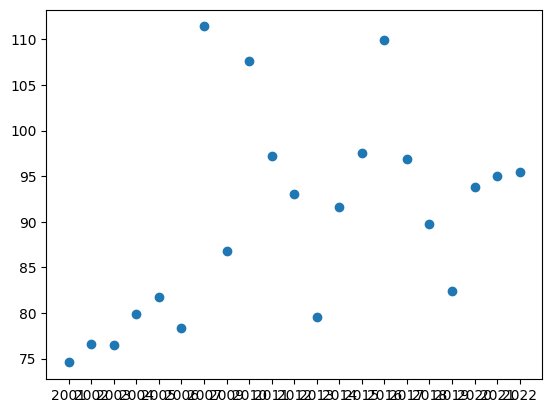

In [85]:
df_sample["QBRate"] = ((((df_sample["Cmp%"] - 30) * 0.05) + ((df_sample["Y/A"] - 3) * 0.25) + (df_sample["TD%"] * 0.2) + (2.375 - (df_sample["Int%"] * 0.5))) / 6) * 100 
plt.scatter(df_sample["Year"], df_sample["QBRate"])

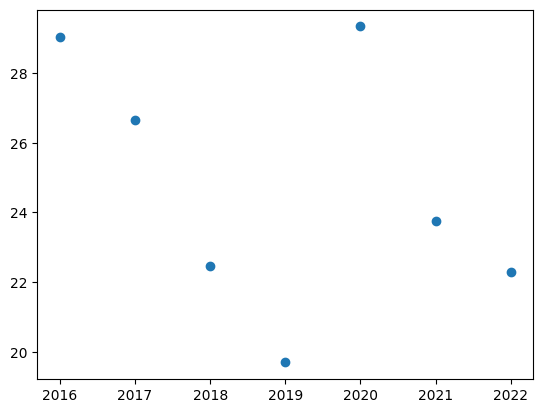

In [30]:
df_OVM = pd.read_csv('data/OffensiveValueMetric.csv')
plt.scatter(df_OVM["Year"], df_OVM["OVM"])

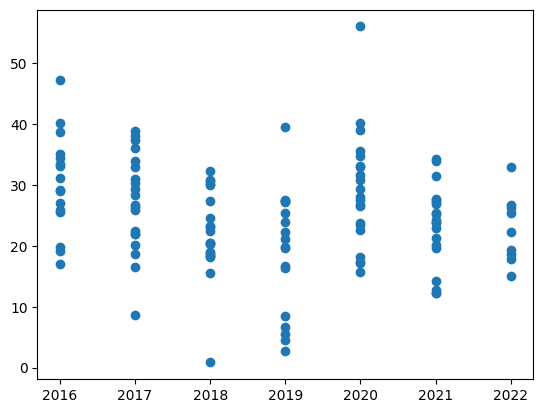

In [32]:
dfOVM2 = pd.read_csv('data/OVM_weekly.csv')
plt.scatter(dfOVM2["Year"], dfOVM2["OVM"])

In [86]:
corrs = {"Mine VS. QBR": None, "Mine VS. OVM": None, "Mine VS. AV": None, "Mine VS. Rate": None}
dfT = df_sample[14:22]
dfT = dfT[::-1]
dfT.reset_index(inplace=True, drop=True)
corrs["Mine VS. QBR"] = df_sample["QBRate"].corr(df_sample["QBR"])
corrs["Mine VS. OVM"] = dfT["QBRate"].corr(df_OVM["OVM"])
corrs["Mine VS. AV"] = df_sample["QBRate"].corr(df_sample["AV"])
corrs["Mine VS. Rate"] = df_sample["QBRate"].corr(df_sample["Rate"])
print(corrs)

{'Mine VS. QBR': 0.7609487002539312, 'Mine VS. OVM': 0.7484272049310515, 'Mine VS. AV': 0.6684171963236661, 'Mine VS. Rate': 0.9785527947519187}


Now I will use a similar calculation now using the adjusted statistics.

{'Mine VS. QBR': 0.7609487002539312, 'Mine VS. OVM': 0.7484272049310515, 'Mine VS. AV': 0.6684171963236661, 'Mine VS. Rate': 0.9785527947519187, 'Mine+ VS. Rate+': 0.9961104868379804}


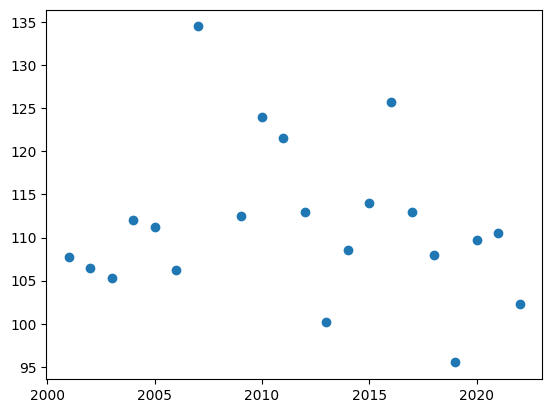

In [111]:
dfA = pd.read_csv('data/TB_AdjPassing.csv')
dfA["QBRate+"] = (dfA["Cmp%+"] + dfA["Y/A+"] + dfA["Int%+"] + dfA["TD%+"]) / 4
plt.scatter(dfA["Year"], dfA["QBRate+"])
corrs["Mine+ VS. Rate+"] = dfA["QBRate+"].corr(dfA["Rate+"])
print(corrs)

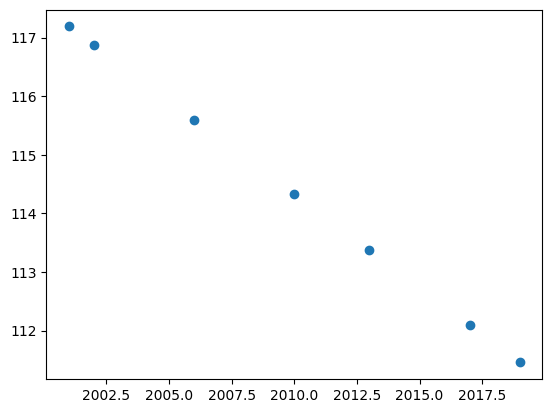

In [115]:
from sklearn.model_selection import train_test_split
X = dfA[["Year"]]
y = dfA["QBRate+"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
plt.scatter(X_test, y_pred)